In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
aax_combined = pd.read_csv("df_aax_combined.csv")

In [14]:
#Este es el de los picos que decías que queda mejor por lustrums
def plot_year_mean(df, params, year_column = 'lustrum', figsize=(10,6)):
    plt.figure(figsize=figsize)

    # Graficar cada parámetro
    for param in params:
        sns.lineplot(x=year_column, y=param, data=df, label=param)
    
    # Configurar la gráfica
    plt.title(f'{", ".join(params)} Year Mean', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Mean', fontsize=14)
    plt.legend(title="Params")
    plt.grid(True)
    plt.xticks(rotation=45) 

    # Mostrar la gráfica
    plt.show()
    

In [31]:
# plot function for df
def bar_year_mean(df, params, type="bar", year_column='year', figsize=(10,6), grid=True):

    plt.figure(figsize=figsize)
    
    # plot each parameter

    if type =="bar": 
        for param in params:
            sns.barplot(df, x=df[year_column],y=df[param])
    elif type == "line": 
        for param in params:
            sns.lineplot(x=year_column, y=param, data=df, label=param)
    
    # Configurar la gráfica
    plt.title(f'{", ".join(params)} mean per year', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(f'{", ".join(params)}', fontsize=14)
    plt.legend(title="Params")
    plt.grid(grid)
    plt.xticks(rotation=45)
    
    # Mostrar la gráfica
    plt.show()


In [48]:
# Agrupar por lustrum
numerical_vars = list(aax_combined.loc[:,(aax_combined.dtypes=="float64")].columns)

In [69]:
df_grouped_by_lustrum = aax_combined[['lustrum']+numerical_vars].groupby('lustrum').mean().reset_index()
df_grouped_by_before_after = aax_combined[['before_1964']+numerical_vars].groupby('before_1964').mean().reset_index()

/var/folders/yf/ydfr37g56sb7b4mncpm76gk00000gn/T/ipykernel_64622/594032715.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Params")


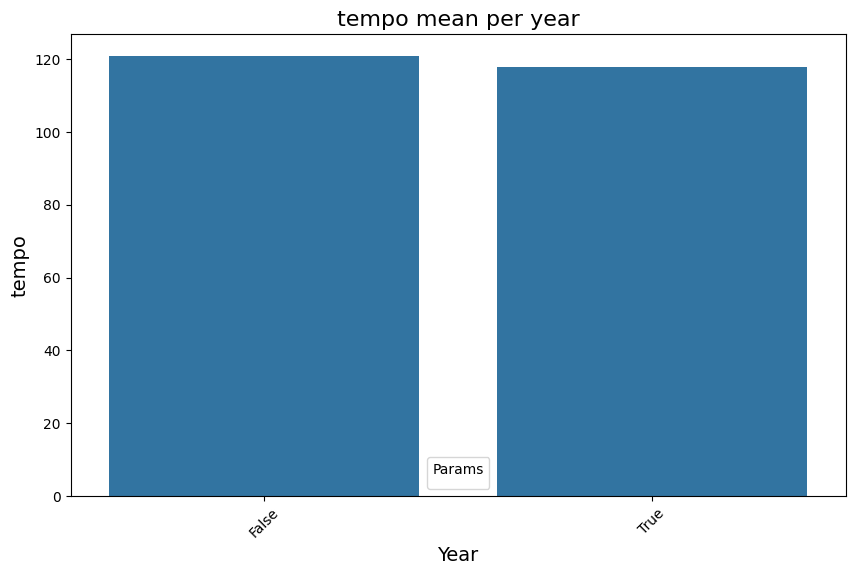

In [81]:
bar_year_mean(df_grouped_by_before_after, params=['tempo'], year_column='before_1964', figsize=(10,6), grid=False)

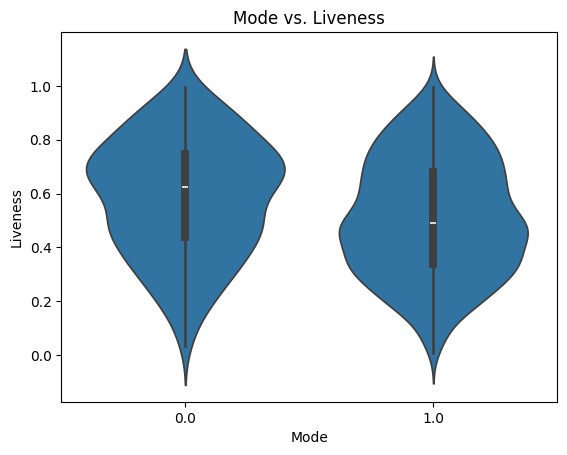

In [73]:
sns.violinplot(x='mode', y='energy', data=aax_combined)
plt.title('Mode vs. Liveness')
plt.xlabel('Mode')
plt.ylabel('Liveness')
plt.show()

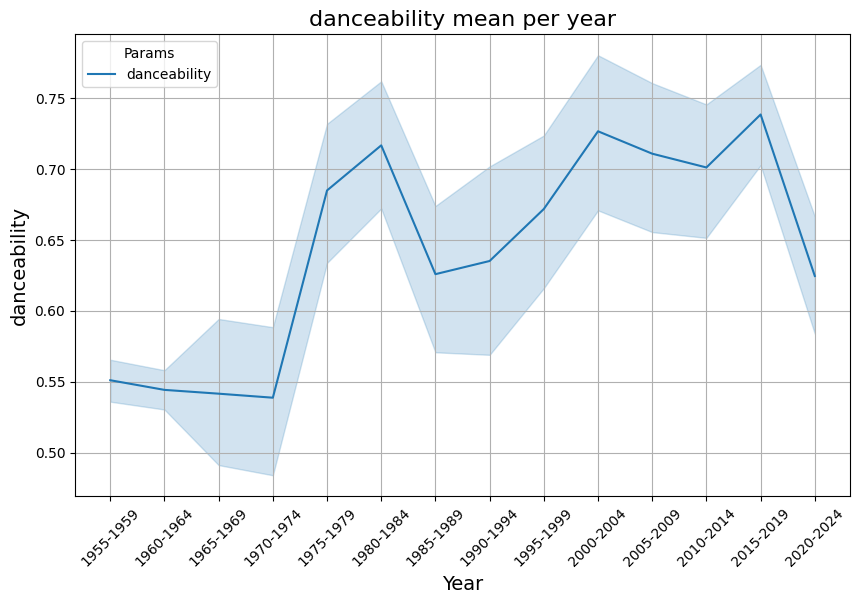

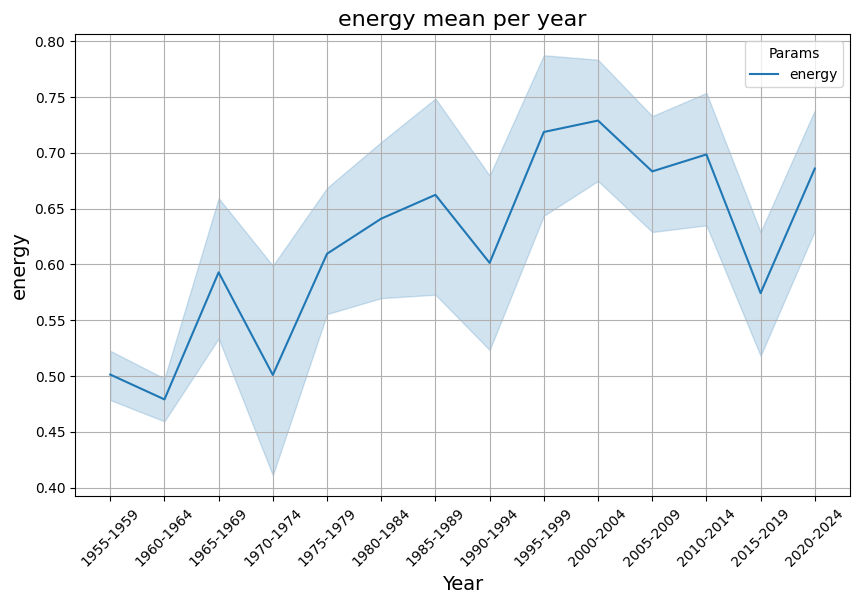

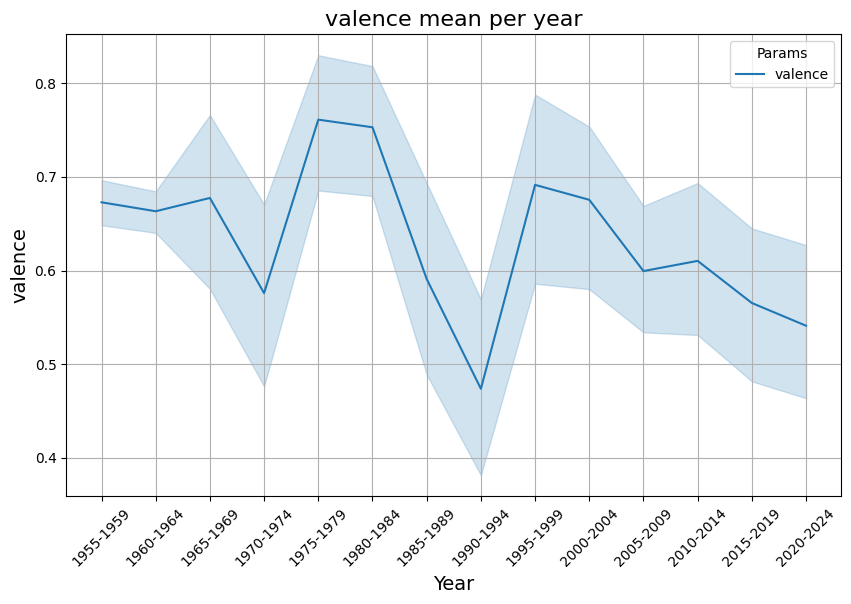

/var/folders/yf/ydfr37g56sb7b4mncpm76gk00000gn/T/ipykernel_64622/594032715.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Params")


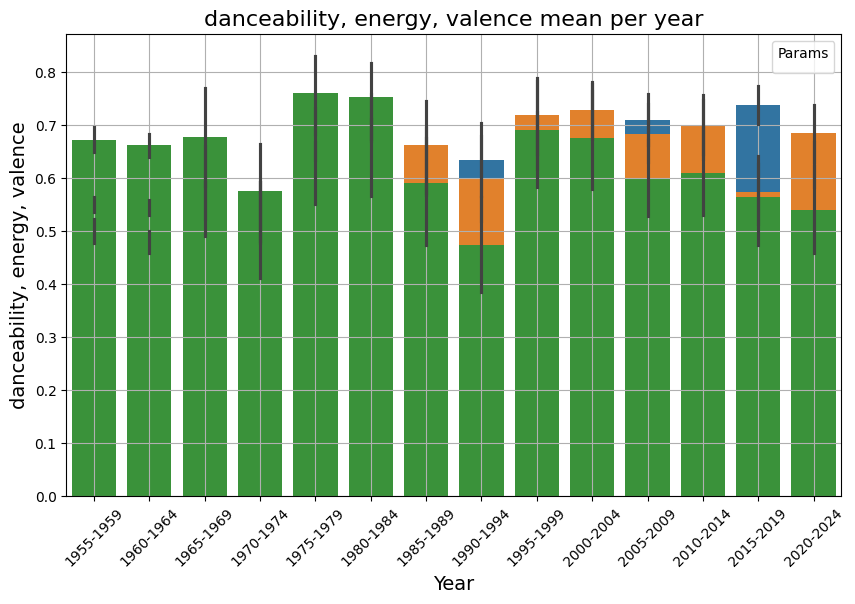

In [83]:
bar_year_mean(aax_combined, params=['danceability'], type='line', year_column='lustrum')
bar_year_mean(aax_combined, params=['energy'], type='line', year_column='lustrum')
bar_year_mean(aax_combined, params=['valence'], type='line', year_column='lustrum')


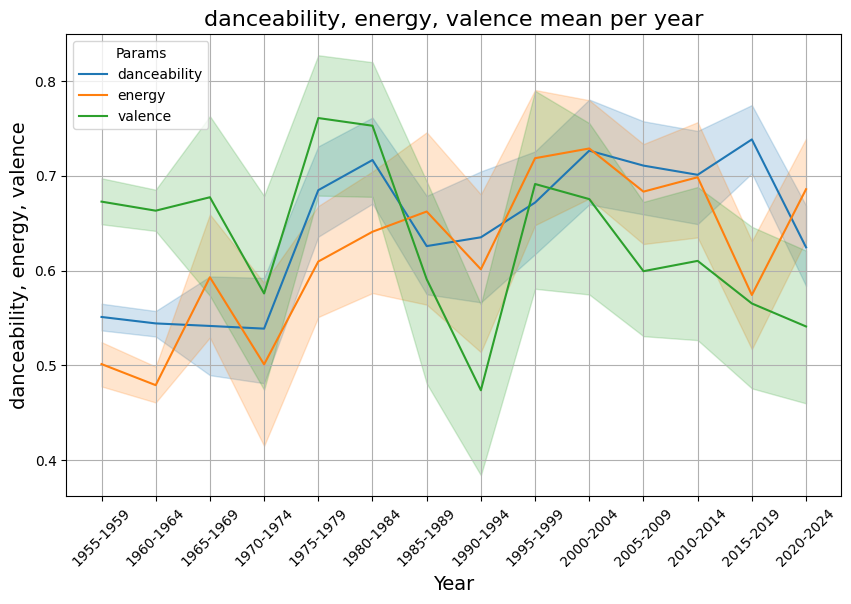

In [84]:
bar_year_mean(aax_combined, params=['danceability','energy','valence'], type='line', year_column='lustrum')


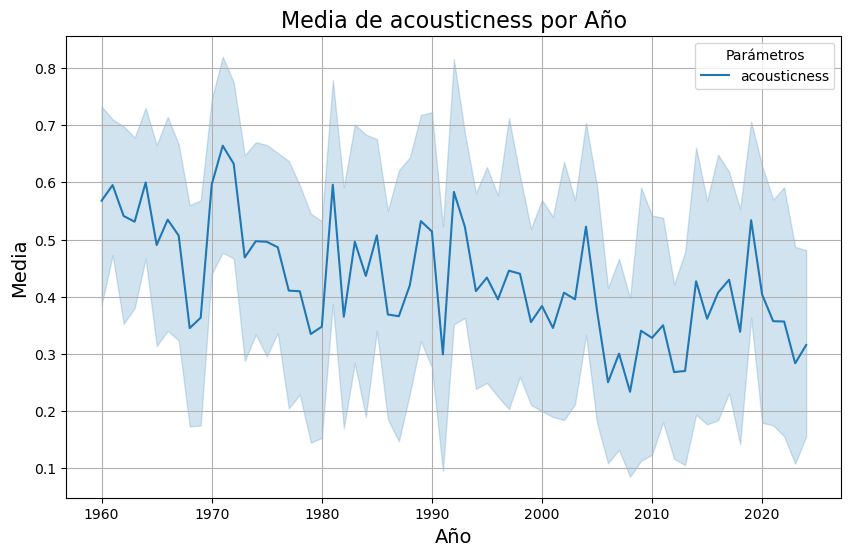

In [39]:
plot_year_mean(df_all, df_60, params=['acousticness'])

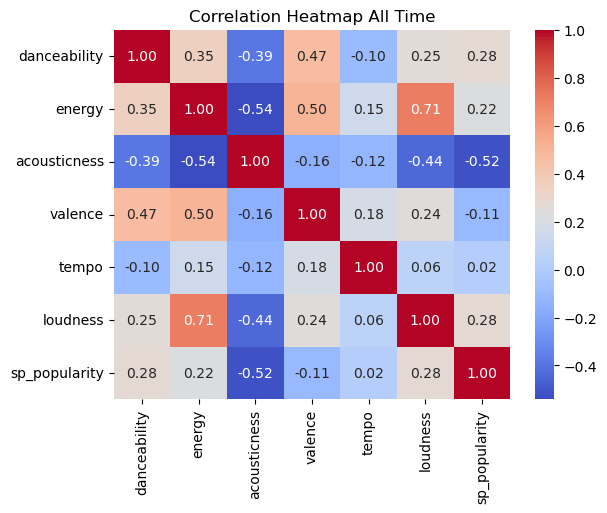

In [40]:
# Calcular la matriz de correlación
corr = aax_combined[['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'loudness','sp_popularity']].corr()

# Crear el heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap All Time')
plt.show()

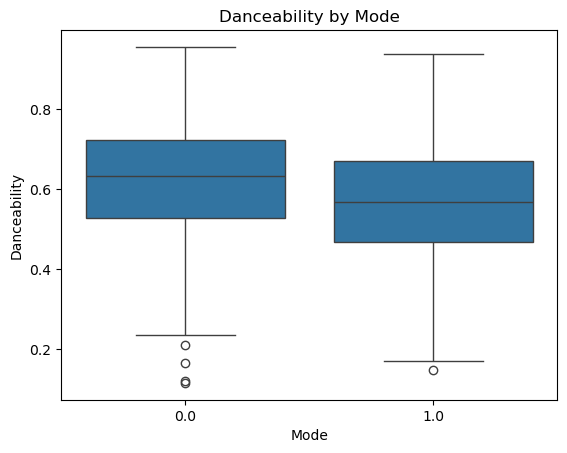

In [41]:
sns.boxplot(x='mode', y='danceability', data=aax_combined)
plt.title('Danceability by Mode')
plt.xlabel('Mode')
plt.ylabel('Danceability')
plt.show()

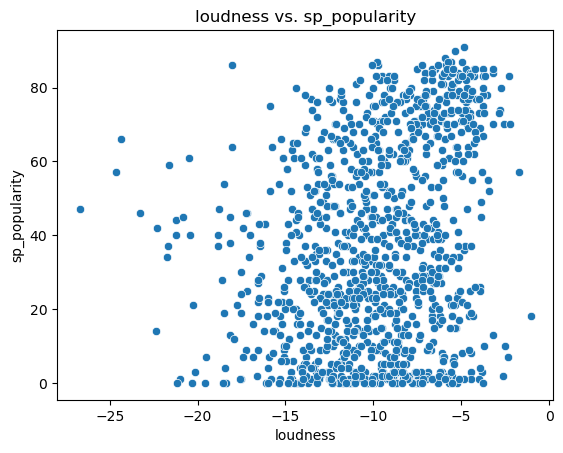

In [42]:
sns.scatterplot(x='loudness', y='sp_popularity', data=aax_combined)
plt.title('loudness vs. sp_popularity')
plt.xlabel('loudness')
plt.ylabel('sp_popularity')
plt.show()

In [ ]:
sns.scatterplot(x='loudness', y='sp_popularity', data=aax_combined)
plt.title('loudness vs. sp_popularity')
plt.xlabel('loudness')
plt.ylabel('sp_popularity')
plt.show()

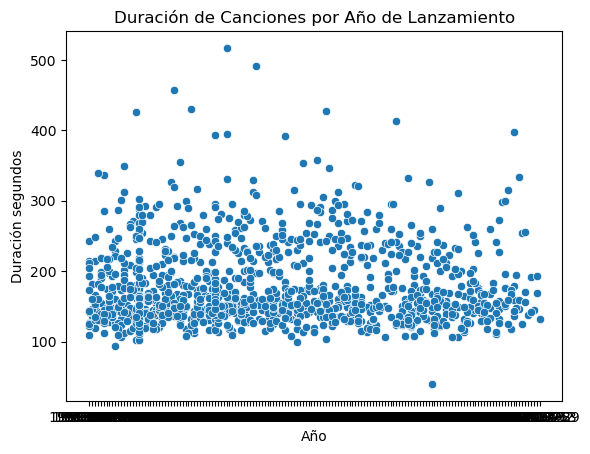

In [66]:

sns.scatterplot(x='peak_date', y='duration', data=aax_combined)
plt.title('Duración de Canciones por Year de Lanzamiento')
plt.xlabel('Year')
plt.ylabel('Duración segundos')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


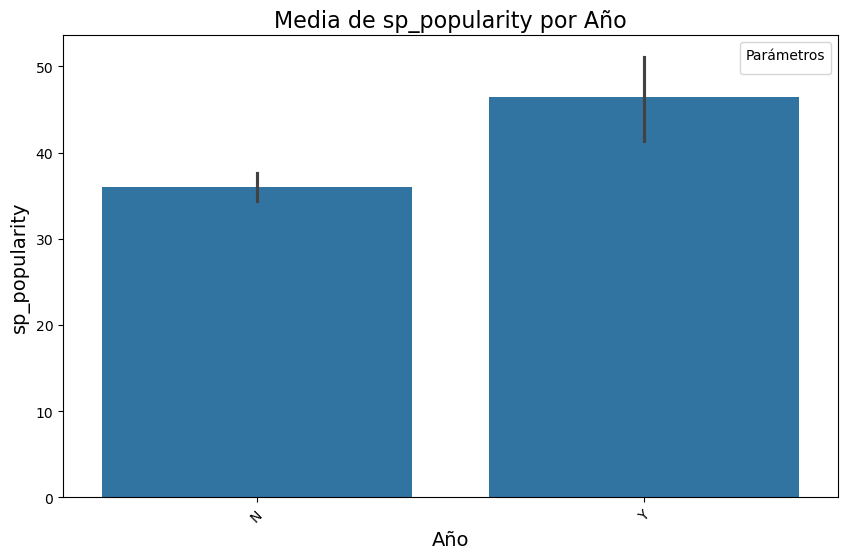

In [63]:

bar_year_mean(aax_combined, ['sp_popularity'], year_column='colab', figsize=(10,6), grid=False)

In [64]:
aax_combined['speechiness'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
814     True
815     True
816    False
817     True
818     True
Name: speechiness, Length: 1144, dtype: bool

ValueError: cannot reindex on an axis with duplicate labels

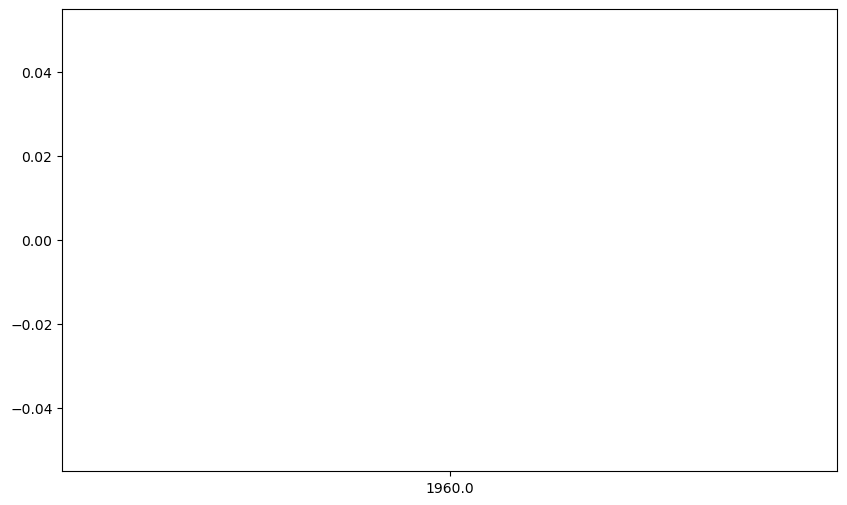

In [61]:

bar_year_mean(aax_combined, params=['speechiness','colab'], year_column='peak_year', figsize=(10,6), grid=False)